<a href="https://colab.research.google.com/github/ktb702/AI260/blob/main/Ch4/Ch4_Face_Feature_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

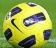

In [3]:
template = cv2.imread('template.jpg')
players = cv2.imread('players.jpg')

cv2_imshow(template)

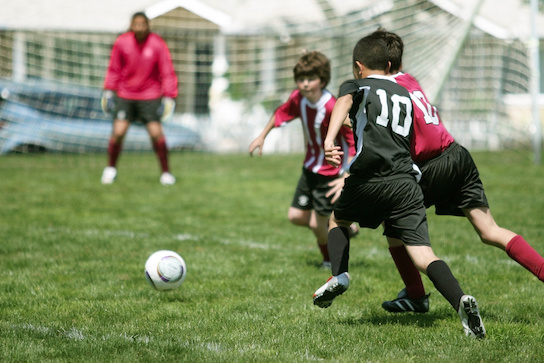

In [4]:
cv2_imshow(players)

In [6]:
# template matching
result = cv2.matchTemplate(players, template, cv2.TM_CCOEFF_NORMED)

0.4392923414707184 (132, 243)


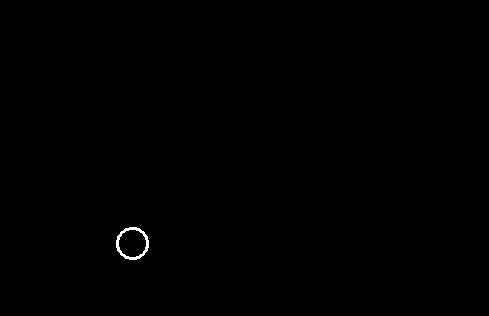

In [7]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(max_val, max_loc)
# 15 is the radius of the circle we are creating, 255 is the color (white), and 2 is the line thickness.
cv2.circle(result, max_loc, 15, 255, 2)

cv2_imshow(result)

In [8]:
####################
## FACE DETECTION ##
####################

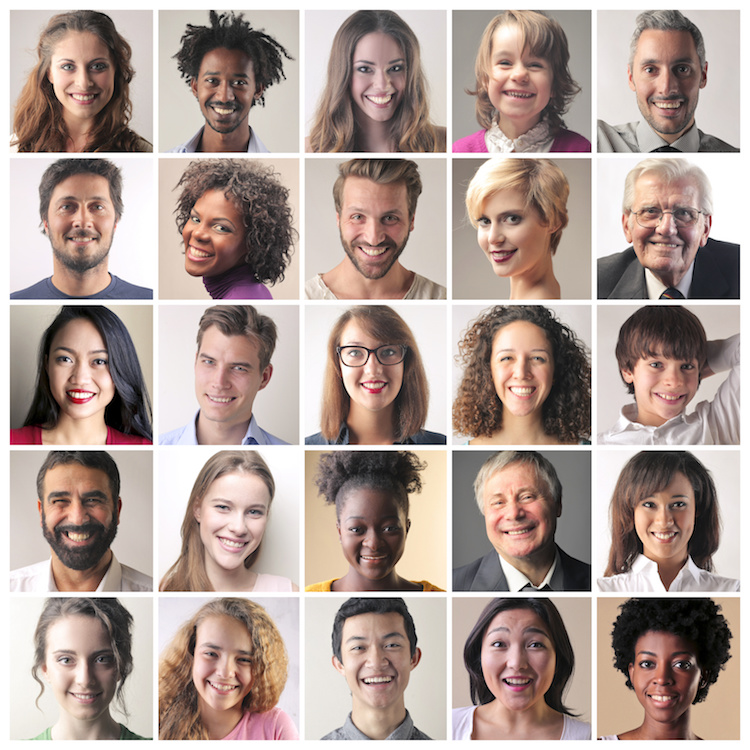

In [16]:
img = cv2.imread('faces.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
path = "haarcascade_frontalface_default.xml"

# create the object that we will use for facial detection
face_cascade = cv2.CascadeClassifier(path)

cv2_imshow(img)

In [ ]:
# scaleFactor defines how close to the camera are we detecting faces?
# minNeighbors sets the nearby object detections required before it's considered a face
# minSize defines the minimum size within the image that we need to detect a face.
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(40,40)) # this doesn't work on collab but works in VSCode

# faces is a list that contains all the bounding boxes for detected faces. If no faces are detected, the length of the list is 0.
print(len(faces))

for (x,y,w,h) in faces:
  # (x,y) is the top left corner
  # (x+w, y+h) is the bottom right corner
  # (0,255,0) is the color value
  # 2 is the line length
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
cv2_imshow(img)